# Finding Premium Charges 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from datetime import datetime
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r'C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\Insurence project\medical_insurance_premium.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df2 = df.copy()

In [7]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


# EDA

In [8]:
categorical_EDA = ['sex', 'smoker','region']

for variable in categorical_EDA:
    print(df2[variable].value_counts())
    print("~"*50)

sex
male      1406
female    1366
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
smoker
no     2208
yes     564
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


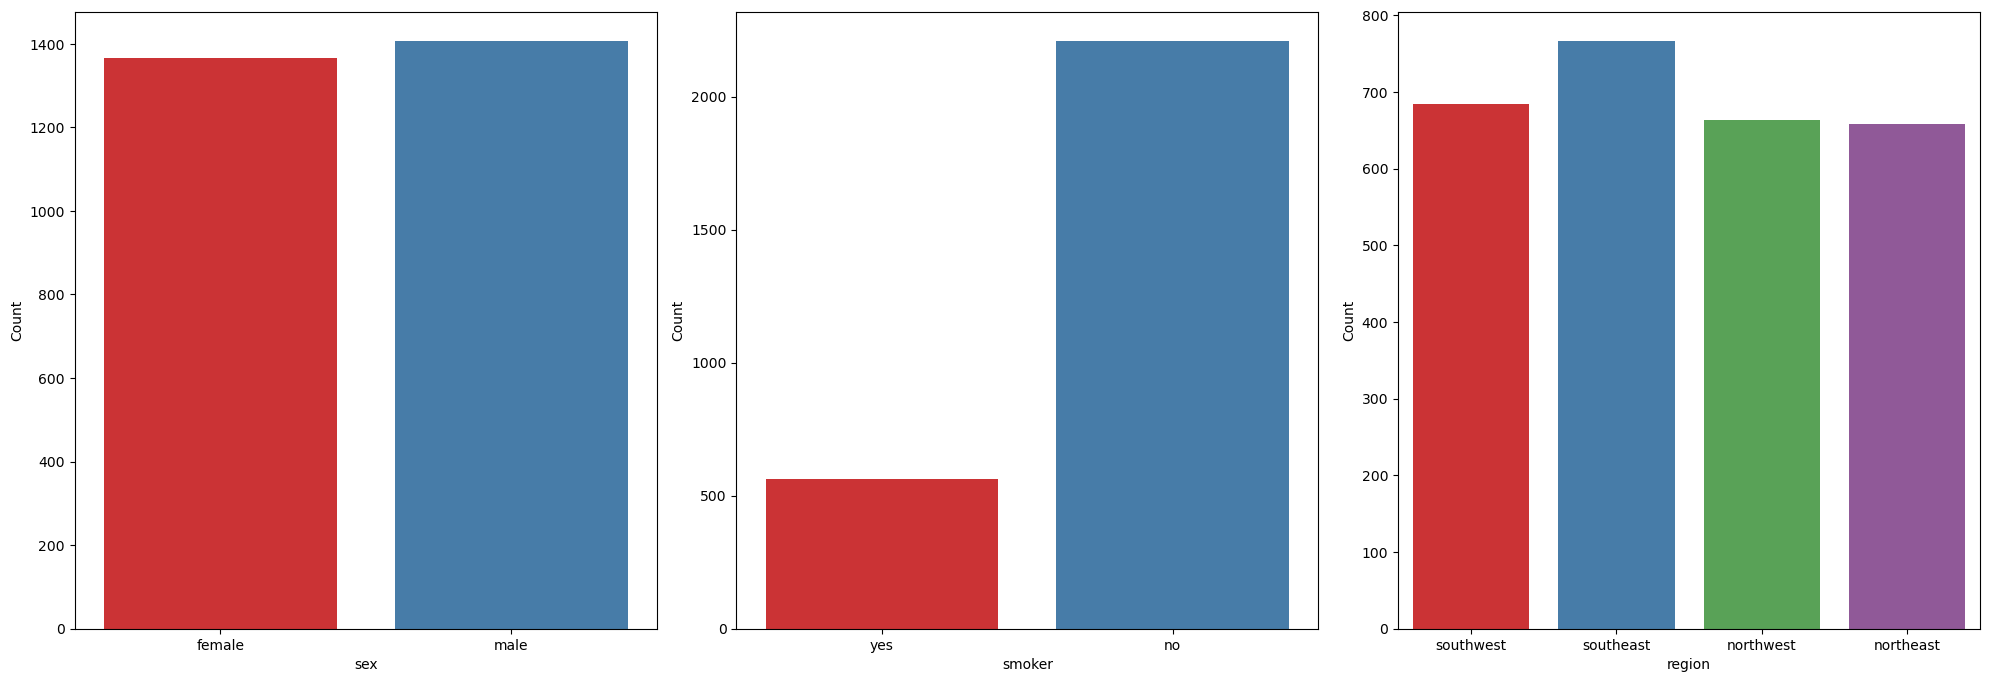

In [9]:
#Count of categories in each variable
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_EDA:
    plt.subplot(3,3,ind)
    sns.countplot(x=df2[variable],palette='Set1')
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

In [10]:
Numerical_EDA = ['charges','children' ,'bmi','age']

In [11]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df2, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df2, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df2, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

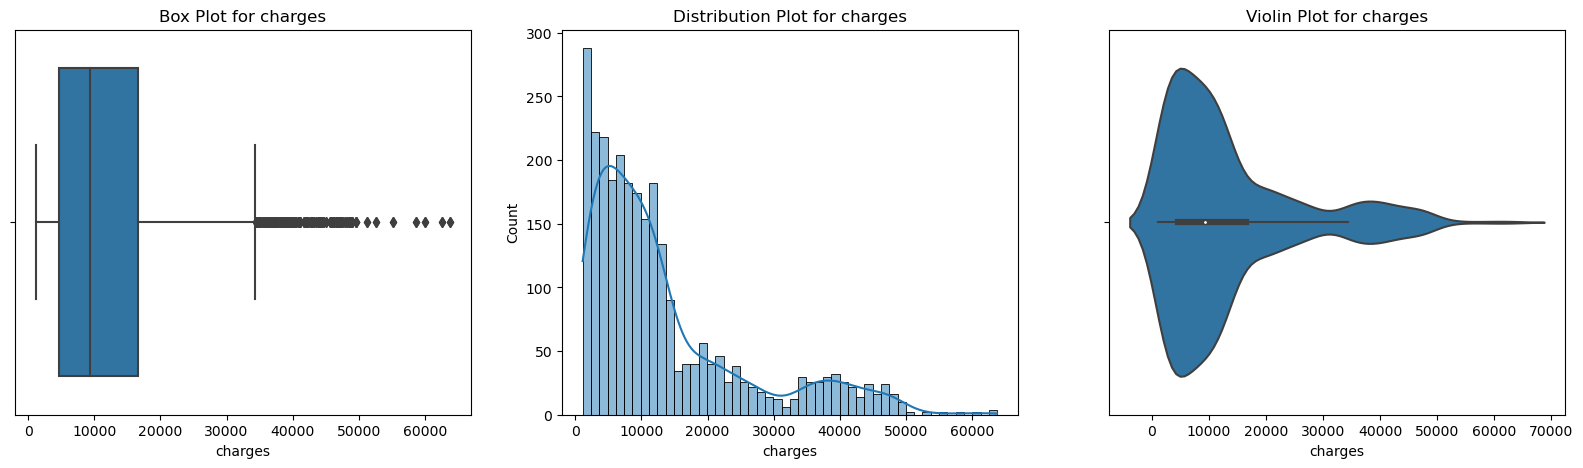

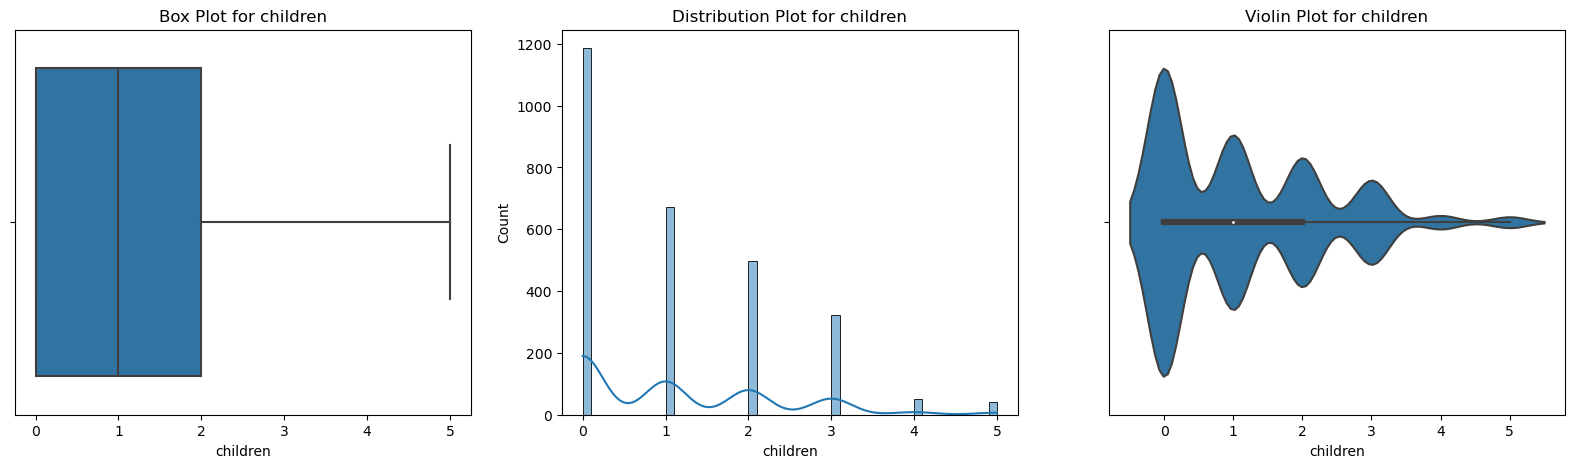

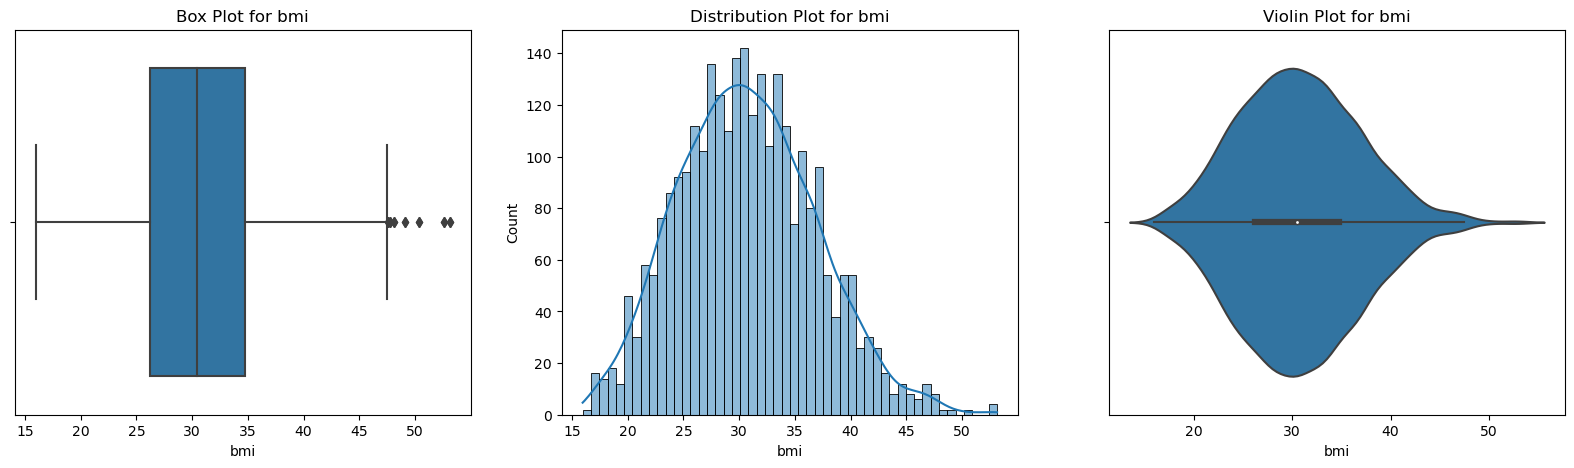

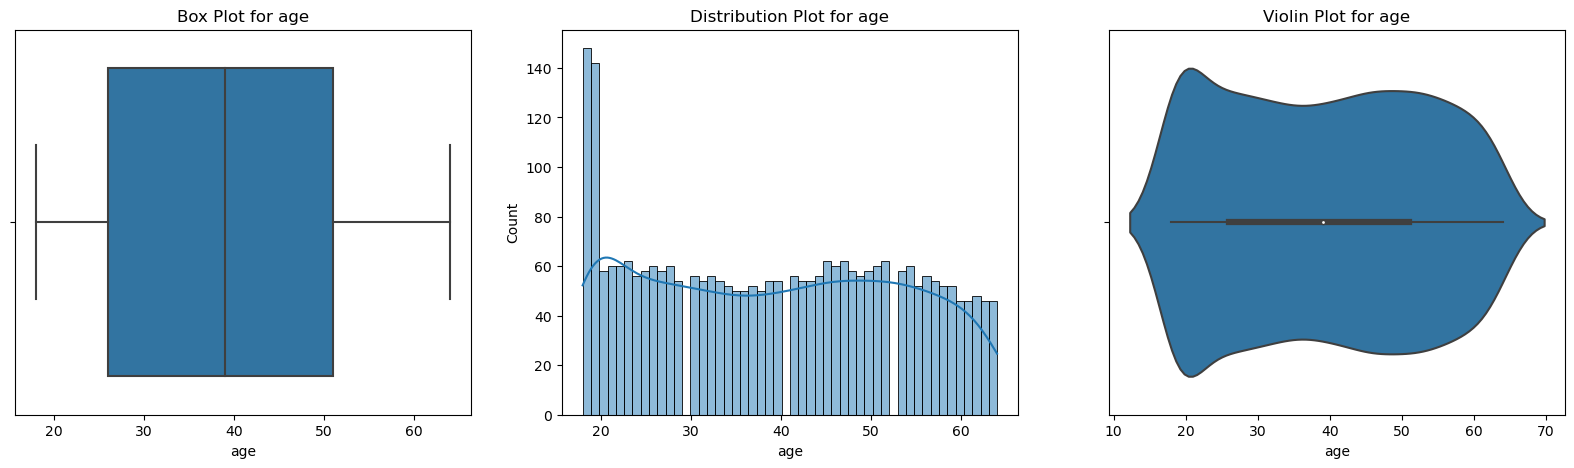

In [12]:
for i in Numerical_EDA:
 plot(df2, i)

we can see that charges distribution is skewed towards right

we can find outliers in columns age, bmi, charges

# Fixing Skewness and Outliers 

In [13]:
df2['charges'] = np.log1p(df2['charges'])

In [14]:
# Fixing Outliers

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [15]:
outlier(df2, 'bmi')

In [16]:
cleaned_numeric = ['age', 'bmi','charges']

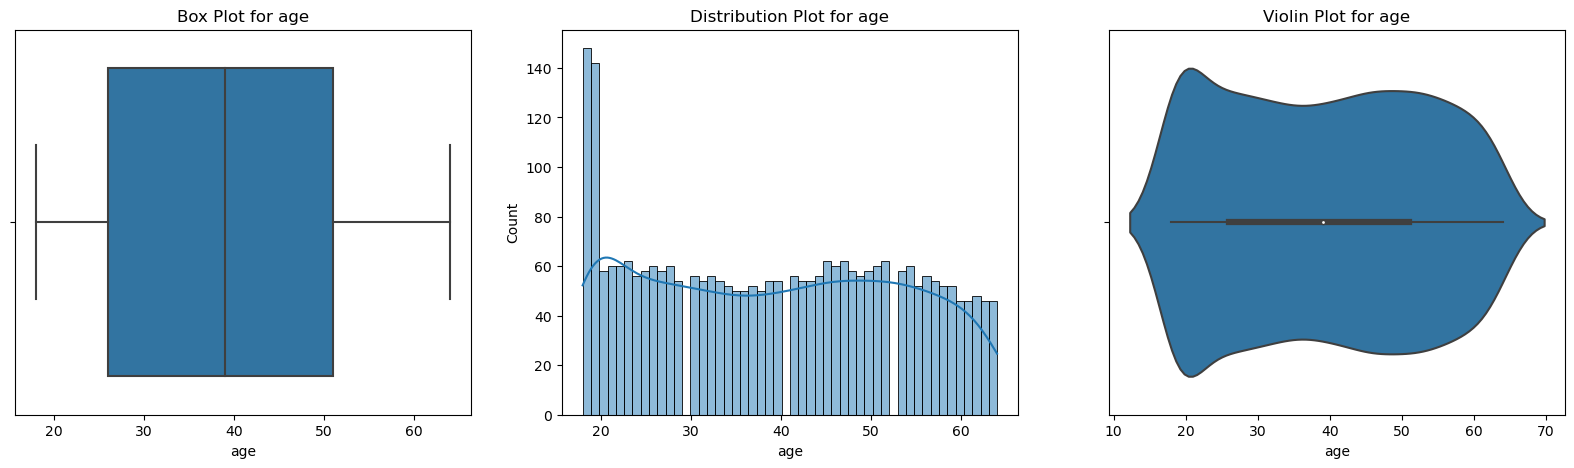

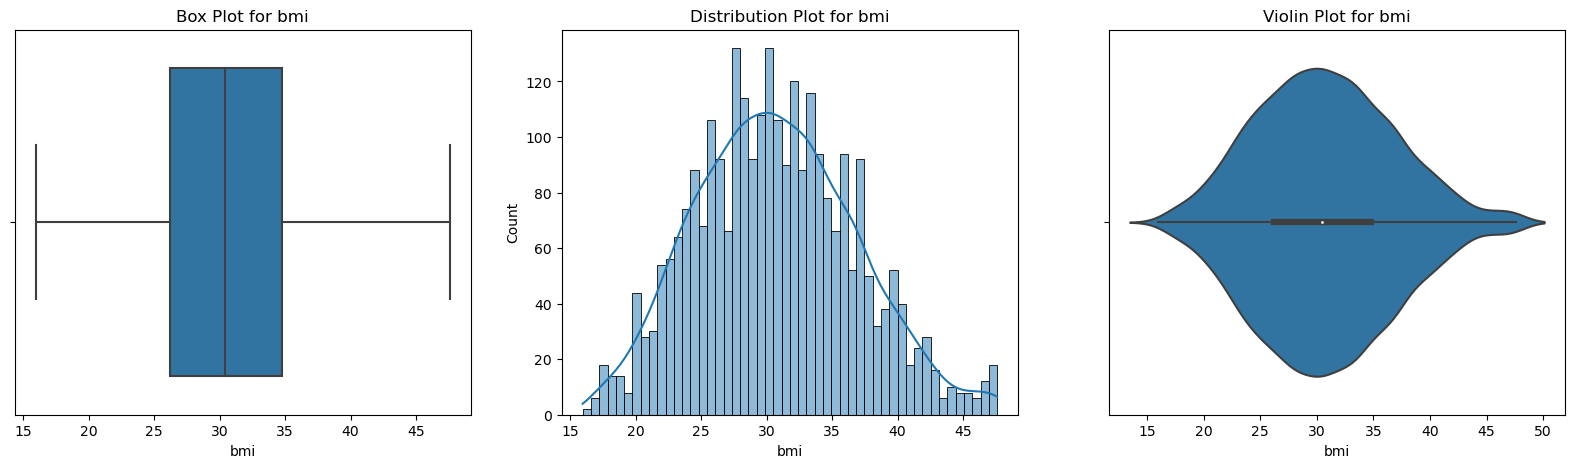

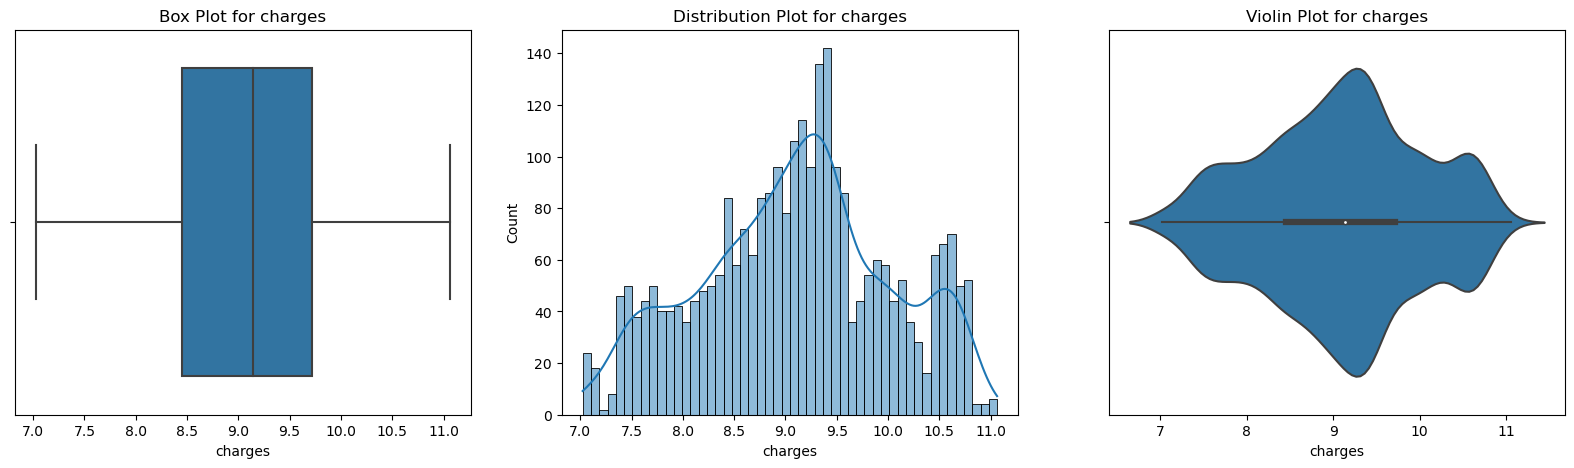

In [17]:
for i in cleaned_numeric:
 plot(df2, i)

In [20]:
def plot_categorical_vs_charges(df, categorical_columns):
    for col in categorical_columns:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Box plot
        sns.boxplot(ax=axes[0], x=col, y='charges', data=df)
        axes[0].set_title(f'Box plot of charges by {col}')
        
        # Violin plot
        sns.violinplot(ax=axes[1], x=col, y='charges', data=df)
        axes[1].set_title(f'Violin plot of charges by {col}')
        
        plt.tight_layout()
        plt.show()


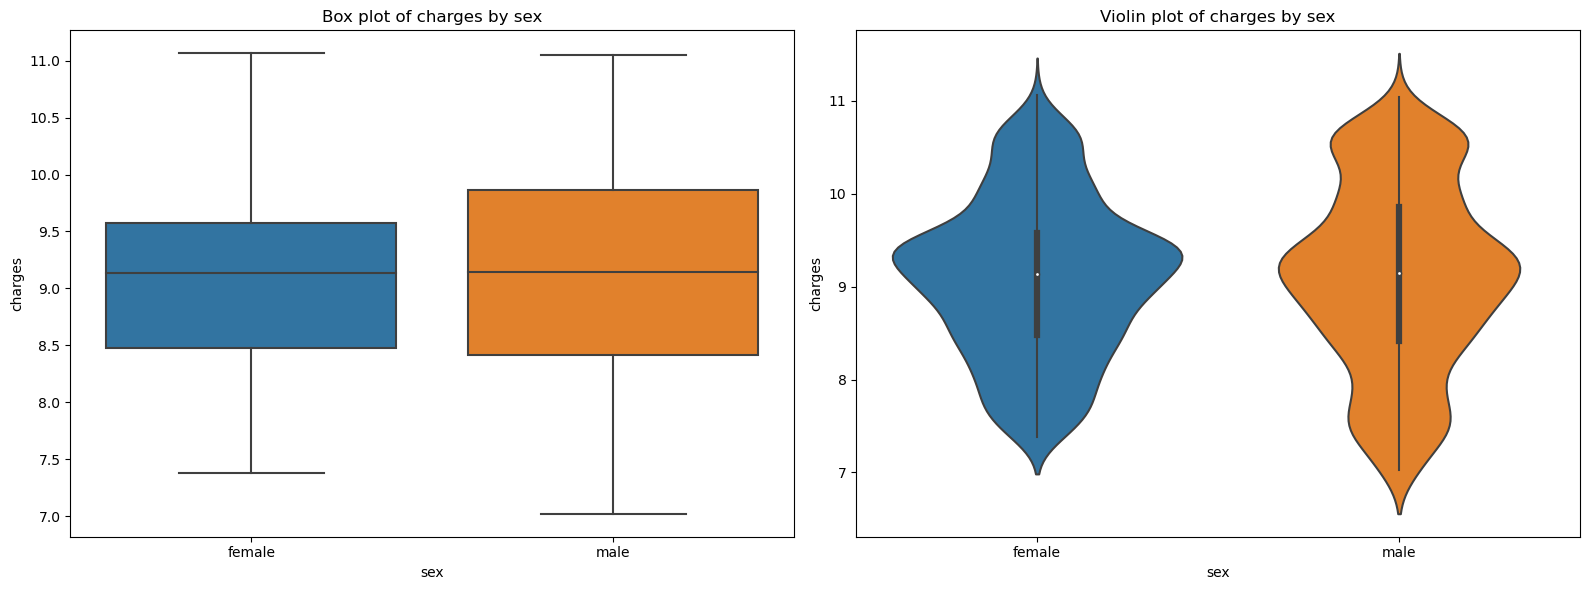

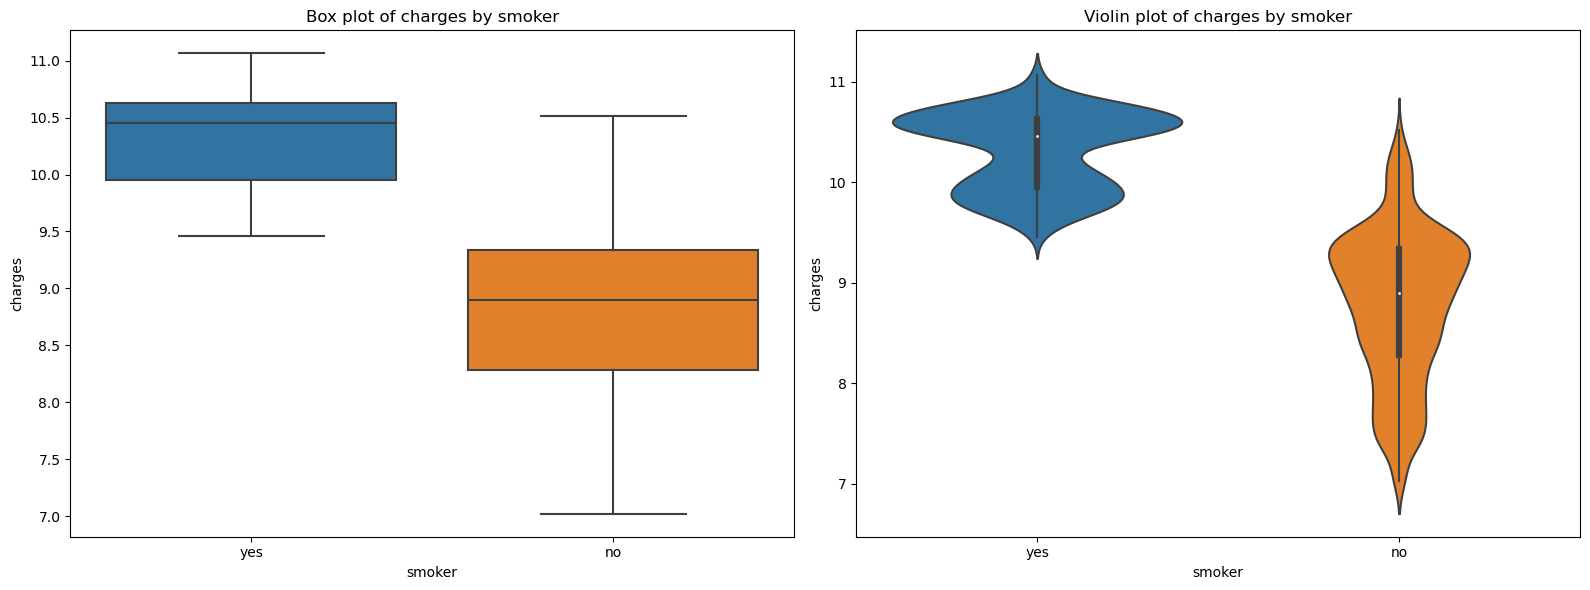

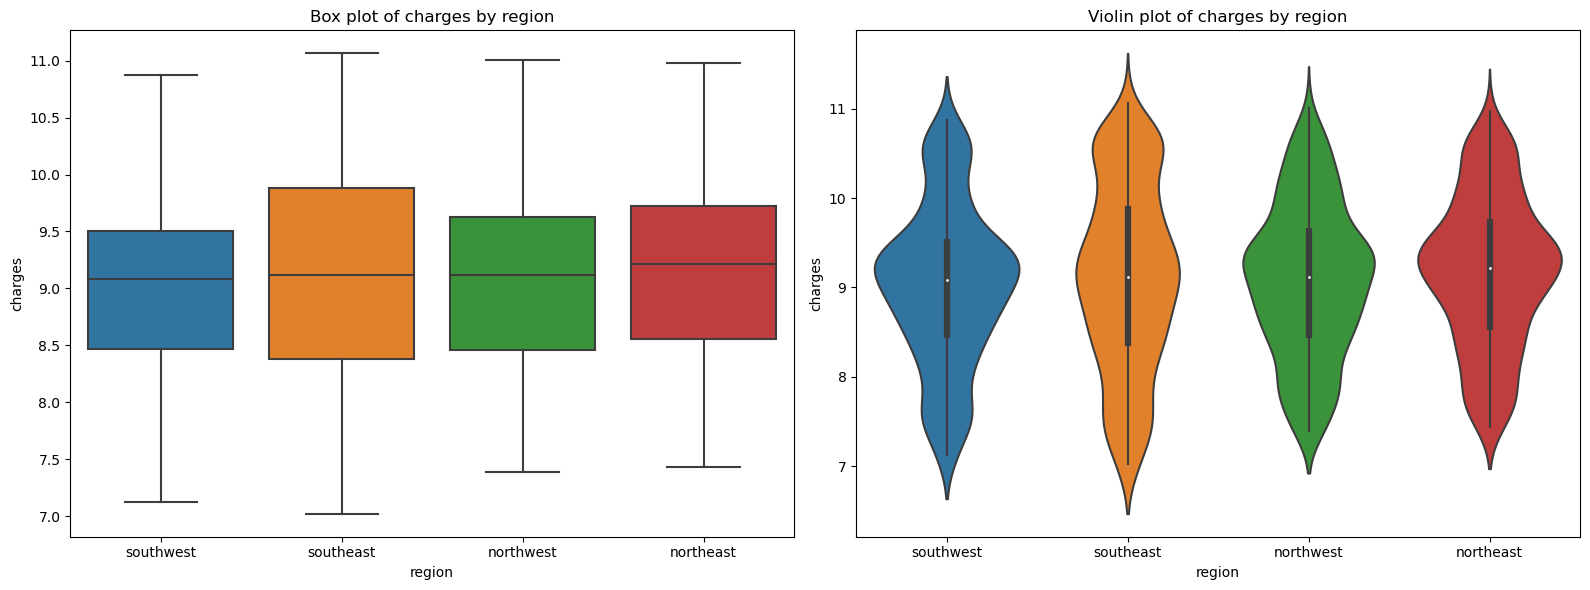

In [21]:
# Generate the plots
plot_categorical_vs_charges(df2, categorical_EDA)

we can see that the premiumm charges for the smoker is higher compared to on smoker 
The charges median are almost sam for any other call

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [23]:
# Evaluation Function

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2)
    
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test.ravel(), y=y_pred.ravel(), alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()


# Encoding And Scaling

In [24]:
# Define features and target variable for the subset
X_subset = df2.drop(columns=['charges'])
y_subset = df2['charges']

In [25]:
# Splitting the subset data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)


In [26]:
# Label Encoding for categorical features
categorical_columns = ['sex', 'smoker','region']
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

In [27]:
# Standard Scaling for numerical features
numerical_columns = ['children' ,'bmi','age']
scaler_features= StandardScaler()
X_train[numerical_columns] = scaler_features.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler_features.transform(X_test[numerical_columns])

In [28]:
# Reshape y_train and y_test to be 2D arrays
y_train_reshaped = np.array(y_train).reshape(-1, 1)
y_test_reshaped = np.array(y_test).reshape(-1, 1)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

In [29]:
selected_features =['sex', 'smoker','region','children' ,'bmi','age']

# Model Training 

In [30]:
# Selecting features for training from balanced data
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


Linear Regressor:
Mean Squared Error: 0.28567665009556115
Mean Absolute Error: 0.3367171627572896
R2 Score: 0.7475447543648603


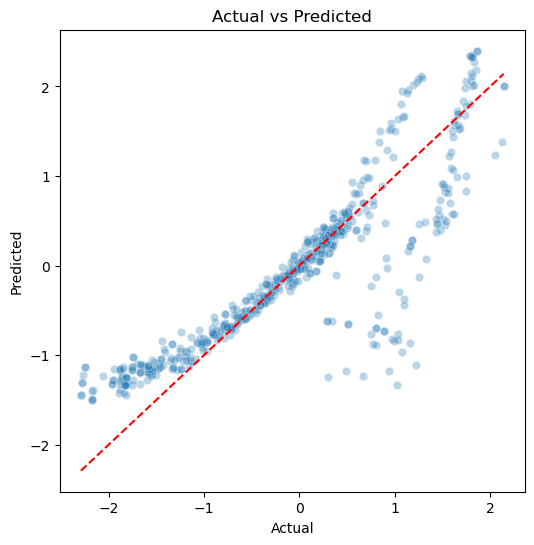

In [31]:
# Linear Regression
print("\nLinear Regressor:")
linear_regressor = LinearRegression()
evaluate_model(linear_regressor, X_train_selected, X_test_selected, y_train_scaled, y_test_scaled)


Ridge Regressor:
Mean Squared Error: 0.28571766015656896
Mean Absolute Error: 0.33699257071180705
R2 Score: 0.7475085133734396


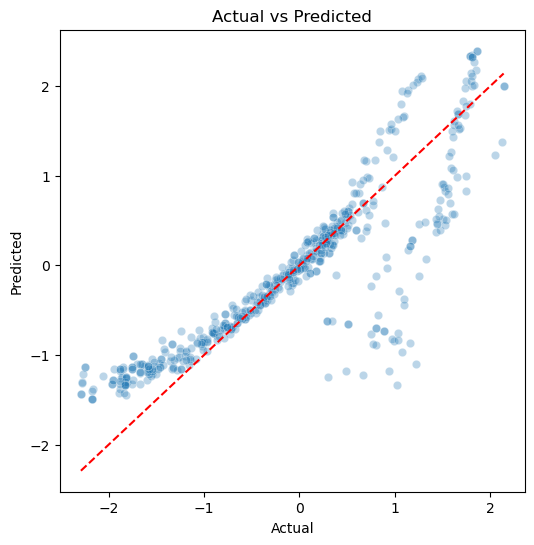

In [32]:
# Ridge Regression
print("\nRidge Regressor:")
ridge_regressor = Ridge(alpha=1.0)
evaluate_model(ridge_regressor, X_train_selected, X_test_selected, y_train_scaled, y_test_scaled)



Lasso Regressor:
Mean Squared Error: 0.3946227552527794
Mean Absolute Error: 0.43487809479906275
R2 Score: 0.6512680172592658


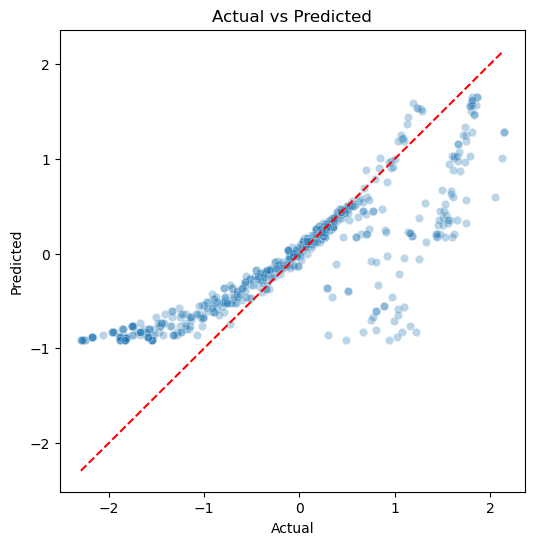

In [33]:
# Lasso Regression
print("\nLasso Regressor:")
lasso_regressor = Lasso(alpha=0.1)
evaluate_model(lasso_regressor, X_train_selected, X_test_selected, y_train_scaled, y_test_scaled)


Decision Tree Regressor:
Mean Squared Error: 0.2283041115951539
Mean Absolute Error: 0.26725960900428447
R2 Score: 0.7982454269434096


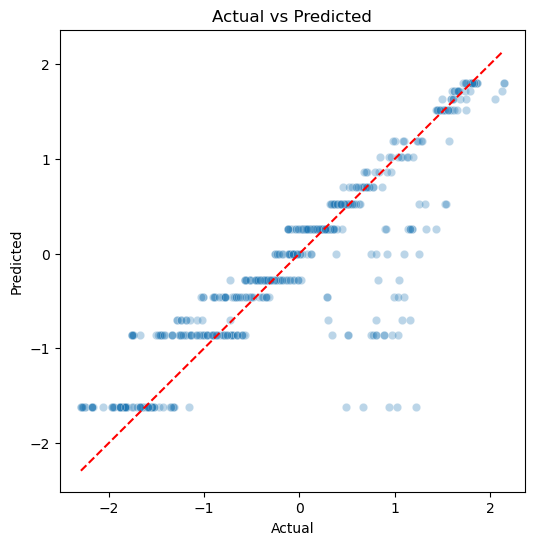

In [34]:
# Decision Tree Regressor
print("\nDecision Tree Regressor:")
dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
evaluate_model(dt_regressor, X_train_selected, X_test_selected, y_train_scaled, y_test_scaled)


Random Forest Regressor:


C:\Users\igomp\AppData\Local\Temp\ipykernel_11644\3680937453.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean Squared Error: 0.07651580244219841
Mean Absolute Error: 0.11721775192197863
R2 Score: 0.9323822381211296


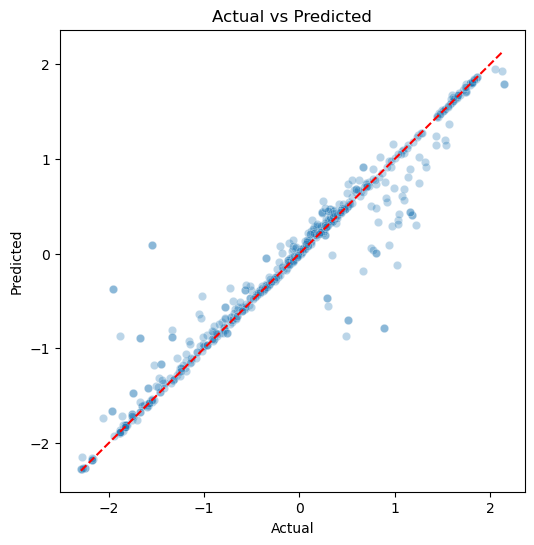

In [35]:
# Random Forest Regressor
print("\nRandom Forest Regressor:")
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)
evaluate_model(rf_regressor, X_train_selected, X_test_selected, y_train_scaled, y_test_scaled)


Gradient Boosting Regressor:


C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.17851714986247663
Mean Absolute Error: 0.20865147085845112
R2 Score: 0.8422426512508422


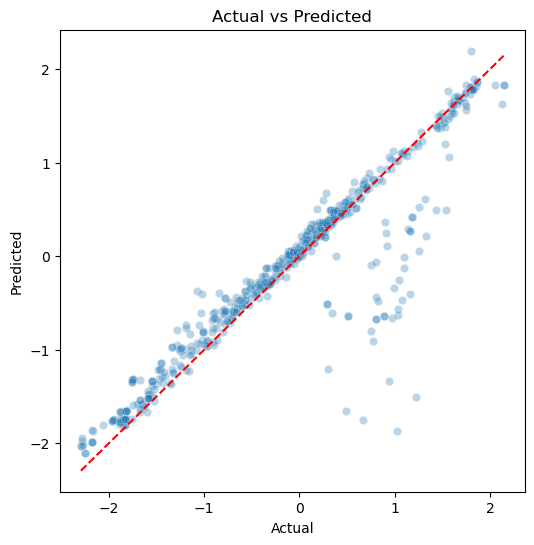

In [36]:
# Gradient Boosting Regressor
print("\nGradient Boosting Regressor:")
gb_regressor = GradientBoostingRegressor(random_state=42)
evaluate_model(gb_regressor, X_train_selected, X_test_selected, y_train_scaled, y_test_scaled)


XGBoost Regressor:
Mean Squared Error: 0.1304231101808392
Mean Absolute Error: 0.18088316964608459
R2 Score: 0.884743823808531


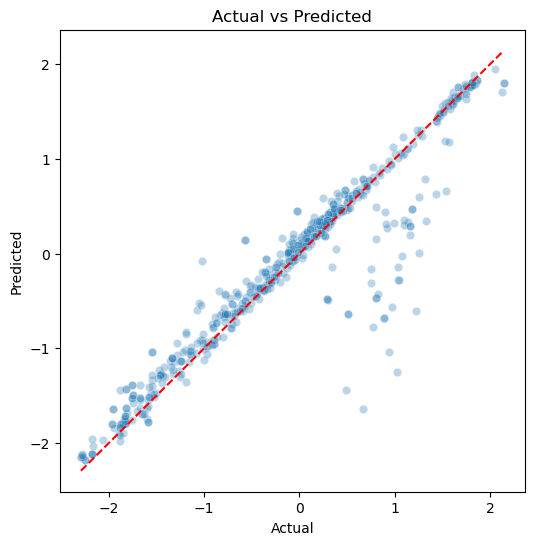

In [37]:
# XGBoost Regressor
print("\nXGBoost Regressor:")
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
evaluate_model(xgb_regressor, X_train_selected, X_test_selected, y_train_scaled, y_test_scaled)


K-Nearest Neighbors Regressor:
Mean Squared Error: 0.2297642438347693
Mean Absolute Error: 0.27087482910783506
R2 Score: 0.7969550938234693


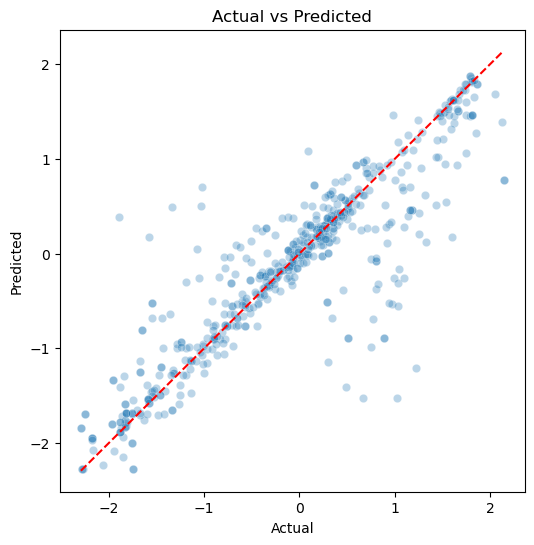

In [38]:
# K-Nearest Neighbors Regressor
print("\nK-Nearest Neighbors Regressor:")
knn_regressor = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_regressor, X_train_selected, X_test_selected, y_train_scaled, y_test_scaled)

# Best model Choosen Model would be XGBoost Regressor, Gradient Boosting Regressor

The XGBoost Regressor Regressor demonstrated strong performance across various evaluation metrics:

Mean Squared Error (MSE): 0.130 (lower is better)

Mean Absolute Error (MAE): 0.180 (lower is better)

R2 Score: 0.88 (higher is better)

These metrics indicate that the Decision Tree Regressor effectively captures the relationships in the data and makes accurate predictions with less MSE and MAE score and Better R2 Score.